Backtesting and Report for Moving Average Crossover

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Total Return: 43.42%
Number of Trades: 9
MOVING AVERAGE CROSSOVER STRATEGY BACKTEST RESULTS
Strategy Parameters: Fast MA = 20 days, Slow MA = 50 days
Total Return: 43.42%
Buy & Hold Return: 76.63%
Number of Trades: 9
Backtest Period: 2020-01-03 to 2022-12-30


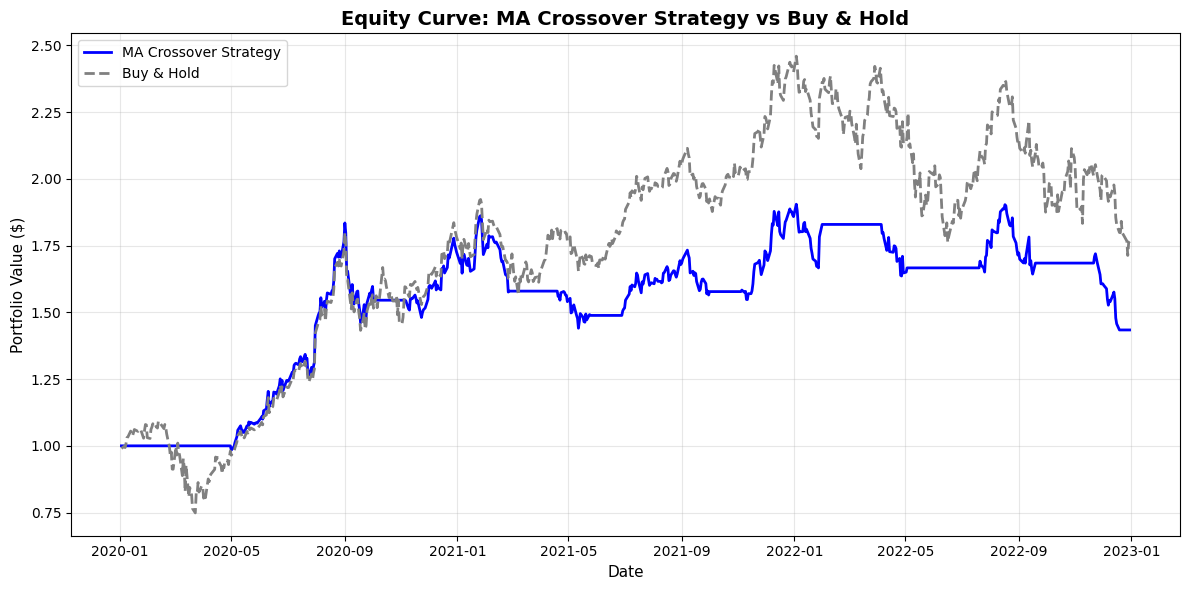

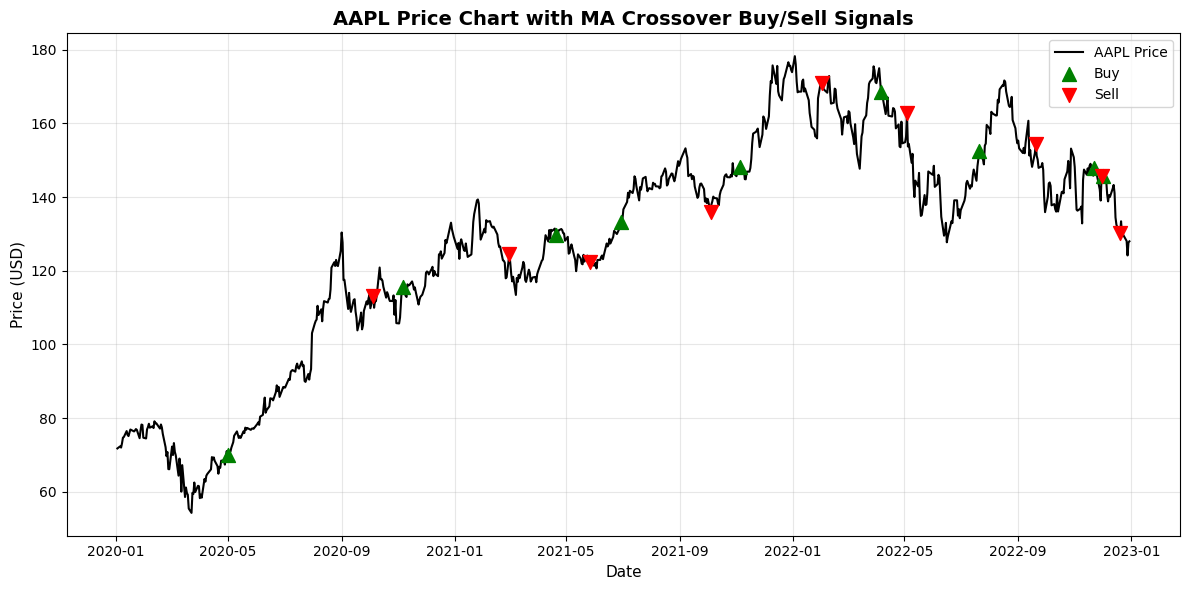

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Run the backtest and report the results
QUIET = True
%run loading-price-data.ipynb
%run backtesting-framework.ipynb
%run moving-average-crossover.ipynb

# Load MAC strategy
signal_ma = ma_crossover_momentum_strategy(data, fast_n=20, slow_n=50)
results_ma = backtest_framework(data, signal_ma)

# Adding all reporting/metrics calculations

# Calculate Cumulative Returns
results_ma['Strategy_Cumulative'] = (1 + results_ma['Strategy_Returns']).cumprod()
results_ma['BuyHold_Cumulative'] = (1 + results_ma['Buy_and_Hold_Returns']).cumprod()

# Track trades
results_ma['Position_Change'] = results_ma['Position'].diff()
results_ma['Buy_Signal'] = (results_ma['Position_Change'] == 1).astype(int)
results_ma['Sell_Signal'] = (results_ma['Position_Change'] == -1).astype(int)

# Calculate metrics
strategy_total_return = (results_ma['Strategy_Cumulative'].iloc[-1] - 1) * 100
buyhold_total_return = (results_ma['BuyHold_Cumulative'].iloc[-1] - 1) * 100
num_trades = results_ma['Buy_Signal'].sum()

print(f"Total Return: {strategy_total_return:.2f}%")
print(f"Number of Trades: {num_trades}")

# Print performance summary
print("=" * 60)
print("MOVING AVERAGE CROSSOVER STRATEGY BACKTEST RESULTS")
print("=" * 60)
print(f"Strategy Parameters: Fast MA = 20 days, Slow MA = 50 days")
print(f"Total Return: {strategy_total_return:.2f}%")
print(f"Buy & Hold Return: {buyhold_total_return:.2f}%")
print(f"Number of Trades: {num_trades}")
print(f"Backtest Period: {results_ma.index[0].date()} to {results_ma.index[-1].date()}")
print("=" * 60)

#Print Equity Curve
plt.figure(figsize=(12, 6))
plt.plot(results_ma.index, results_ma['Strategy_Cumulative'], 
         label='MA Crossover Strategy', linewidth=2, color='blue')
plt.plot(results_ma.index, results_ma['BuyHold_Cumulative'], 
         label='Buy & Hold', linewidth=2, color='gray', linestyle='--')
plt.title('Equity Curve: MA Crossover Strategy vs Buy & Hold', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Portfolio Value ($)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#Price chart with buy/sell markers
# Identify buy and sell points
buy_points = results_ma[results_ma['Buy_Signal'] == 1]
sell_points = results_ma[results_ma['Sell_Signal'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(results_ma.index, results_ma['Close'], 
         label='AAPL Price', linewidth=1.5, color='black')
plt.scatter(buy_points.index, buy_points['Close'], 
           marker='^', color='green', s=100, label='Buy', zorder=5)
plt.scatter(sell_points.index, sell_points['Close'], 
           marker='v', color='red', s=100, label='Sell', zorder=5)
plt.title('AAPL Price Chart with MA Crossover Buy/Sell Signals', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=11)
plt.ylabel('Price (USD)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

